In [181]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import datetime
import time

In [148]:
data = pd.read_csv('Downloads\sensex22.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3.4.20,28623.52930,28639.11914,27500.78906,27590.94922,27590.94922,18900
1,4.4.20,28898.35938,30157.65039,28602.31055,30067.21094,30067.21094,21900
2,5.4.20,29701.91992,31227.97070,29602.93945,29893.96094,29893.96094,24700
3,6.4.20,30571.18945,31225.19922,30420.22070,31159.61914,31159.61914,18800
4,7.4.20,31195.72070,31195.72070,30474.15039,30690.01953,30690.01953,16100


In [149]:
#data['date'] = [datetime.datetime.strptime(x,'%Y-%m-%d') for x in data['Date'] ]
#for x in data['date']:
   # time.strftime('%Y/%m/%d', x) 
#data['date'] = data['Date'].replace('.','/')

In [150]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,3.4.20,28623.52930,28639.11914,27500.78906,27590.94922,27590.94922,18900
1,4.4.20,28898.35938,30157.65039,28602.31055,30067.21094,30067.21094,21900
2,5.4.20,29701.91992,31227.97070,29602.93945,29893.96094,29893.96094,24700
3,6.4.20,30571.18945,31225.19922,30420.22070,31159.61914,31159.61914,18800
4,7.4.20,31195.72070,31195.72070,30474.15039,30690.01953,30690.01953,16100


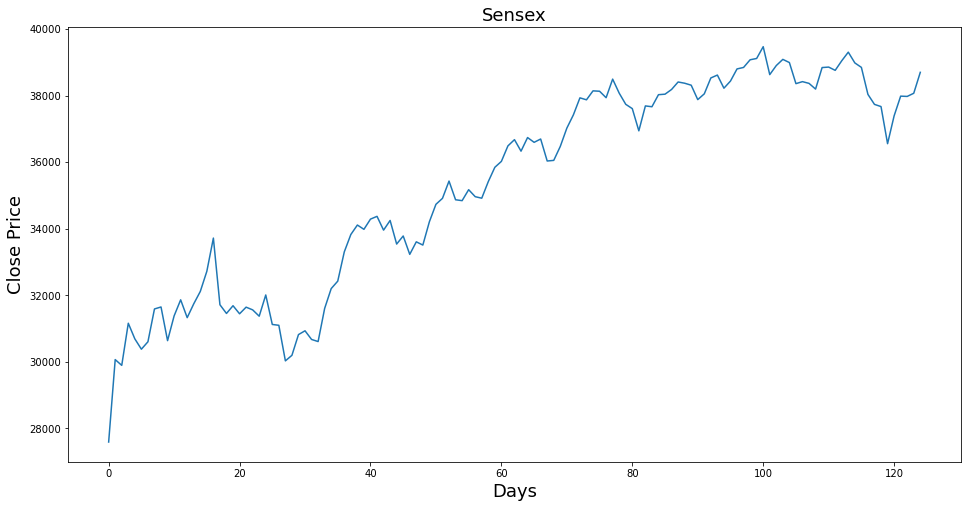

In [151]:
plt.figure(figsize=(16,8))
plt.title('Sensex', fontsize = 18)
plt.xlabel('Days', fontsize= 18)
plt.ylabel('Close Price', fontsize = 18)
plt.plot(data['Close'])
plt.show()

In [164]:
#Create a variable to predict 'x' days out into the future
future_days = 25
#Create a new column (the target or dependent variable) shifted 'x' units/days up
data['Prediction'] = data[['Close']].shift(-future_days)
#print the data
data.tail(4)

,Date,Open,High,Low,Close,Adj Close,Volume,Prediction
121,2.8.20,37756.25000,38035.87109,37544.05078,37981.62891,37981.62891,13600,NaN
122,3.8.20,38176.85938,38235.94141,37831.35156,37973.21875,37973.21875,10600,NaN
123,4.8.20,38068.89063,38236.33984,37828.10938,38067.92969,38067.92969,18400,NaN
124,5.8.20,38410.19922,38738.89063,38410.19922,38697.05078,38697.05078,12900,NaN


In [165]:
X = np.array(data.drop(['Prediction','Date'], 1))[:-future_days]
print(X)

[[ 28623.5293   28639.11914  27500.78906  27590.94922  27590.94922
   18900.     ]
 [ 28898.35938  30157.65039  28602.31055  30067.21094  30067.21094
   21900.     ]
 [ 29701.91992  31227.9707   29602.93945  29893.96094  29893.96094
   24700.     ]
 [ 30571.18945  31225.19922  30420.2207   31159.61914  31159.61914
   18800.     ]
 [ 31195.7207   31195.7207   30474.15039  30690.01953  30690.01953
   16100.     ]
 [ 31277.10938  31568.35938  30222.07031  30379.81055  30379.81055
   23600.     ]
 [ 30095.50977  30800.19922  30016.16992  30602.60938  30602.60938
   16900.     ]
 [ 31656.67969  31718.73047  30960.93945  31588.7207   31588.7207
   22200.     ]
 [ 32056.18945  32056.4707   31490.25977  31648.       31648.
   17200.     ]
 [ 30836.18945  30900.11914  30378.25977  30636.71094  30636.71094
   19700.     ]
 [ 30856.14063  31471.14063  30578.55078  31379.55078  31379.55078
   21000.     ]
 [ 31646.44922  31959.01953  31292.91992  31863.08008  31863.08008
   24400.     ]
 [ 31426.6

In [166]:
#target
y = np.array(data['Prediction'])[:-future_days]
print(y)

[31122.89063 31097.73047 30028.98047 30196.16992 30818.60938 30932.90039
 30672.58984 30609.30078 31605.2207  32200.58984 32424.09961 33303.51953
 33825.53125 34109.53906 33980.69922 34287.23828 34370.57813 33956.69141
 34247.05078 33538.37109 33780.89063 33228.80078 33605.21875 33507.92188
 34208.05078 34731.73047 34911.32031 35430.42969 34868.98047 34842.10156
 35171.26953 34961.51953 34915.80078 35414.44922 35843.69922 36021.42188
 36487.28125 36674.51953 36329.01172 36737.69141 36594.32813 36693.69141
 36033.05859 36051.80859 36471.67969 37020.14063 37418.98828 37930.32813
 37871.51953 38140.46875 38128.89844 37934.73047 38492.94922 38071.12891
 37736.07031 37606.89063 36939.60156 37687.91016 37663.32813 38025.44922
 38040.57031 38182.07813 38407.01172 38369.62891 38310.48828 37877.33984
 38050.78125 38528.32031 38614.78906 38220.39063 38434.71875 38799.07813
 38843.87891 39073.92188 39113.46875 39467.30859 38628.28906 38900.80078
 39086.03125 38990.94141 38357.17969 38417.23047 38

In [167]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [169]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [173]:
#Get the feature data, 
#AKA all the rows from the original data set except the last 'x' days
x_future = data.drop(['Prediction','Date'], 1)[:-future_days]
#Get the last 'x' rows
x_future = x_future.tail(future_days) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[37949.58984, 38235.73047, 37748.41016, 38128.89844, 38128.89844,
        19900.     ],
       [38275.33984, 38275.33984, 37769.44141, 37934.73047, 37934.73047,
        18600.     ],
       [38052.17969, 38554.71875, 37998.12891, 38492.94922, 38492.94922,
        15500.     ],
       [38427.14844, 38617.03125, 37884.41016, 38071.12891, 38071.12891,
        17600.     ],
       [38262.82813, 38413.80859, 37678.42188, 37736.07031, 37736.07031,
        14800.     ],
       [37847.87891, 37897.78125, 37431.67969, 37606.89063, 37606.89063,
        20200.     ],
       [37595.73047, 37596.01953, 36911.23047, 36939.60156, 36939.60156,
        14300.     ],
       [37092.85938, 37745.60156, 36987.73047, 37687.91016, 37687.91016,
        15100.     ],
       [37892.35938, 38139.96094, 37550.60156, 37663.32813, 37663.32813,
        19800.     ],
       [37946.80078, 38221.39844, 37755.10156, 38025.44922, 38025.44922,
        16600.     ],
       [37951.07031, 38109.67969, 37787.37891, 380

In [174]:
tree_prediction = tree.predict(x_future)
print( tree_prediction )
print()
#Show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[39467.30859 38845.82031 38900.80078 39086.03125 38990.94141 38357.17969
 38417.23047 38365.35156 38365.35156 38840.32031 38990.94141 38756.62891
 39044.35156 39302.85156 38979.85156 38845.82031 39113.46875 37734.07813
 37668.42188 36553.60156 37388.66016 37981.62891 37973.21875 37973.21875
 38697.05078]

[39064.88815629 38926.6129016  39241.0139476  38940.8126978
 38582.77326472 38665.8635466  38004.72829857 38638.29048801
 38569.1871357  38878.47046184 38917.8403987  38922.94597195
 39151.6001891  39352.90632574 39097.87799164 38872.74978618
 39108.91396378 39232.0641422  39281.43459966 38980.73318819
 39144.6597383  39616.52496166 39565.97748662 39775.44693136
 39720.60192084]


c:\users\shreeyash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


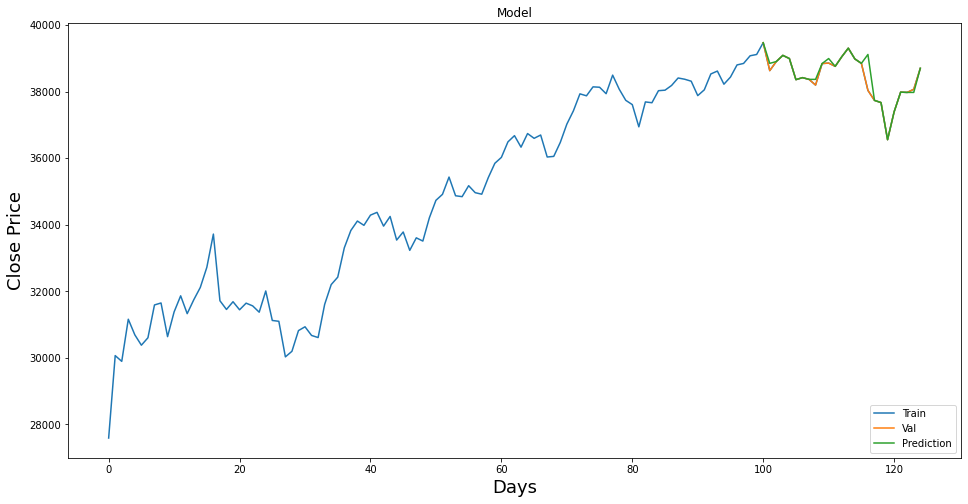

In [177]:
#Visualize the data
predictions = tree_prediction
#Plot the data
valid =  data[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

c:\users\shreeyash\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


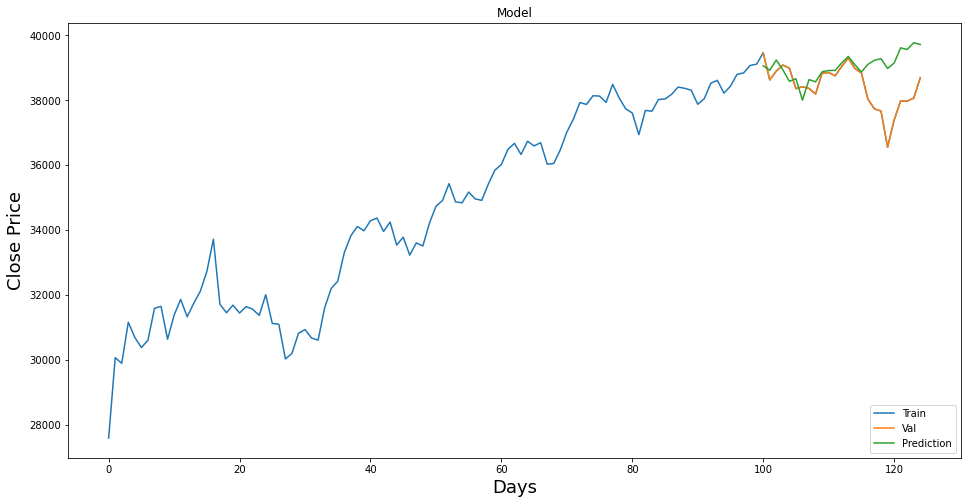

In [179]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  data[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.plot(data['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

In [184]:
# Calculate MAE
mae = mean_absolute_error(tree_prediction,valid['Close']) # Your code here
mae2 = mean_absolute_error(lr_prediction,valid['Close'])

print("Mean Absolute Error:" , mae)
print("Mean Absolute Error:" , mae2)

Mean Absolute Error: 67.97562479999993
Mean Absolute Error: 714.4550771954667
